<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Financial_Costing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
================================================================================
SIMPLE .dta DATASET FEATURE ANALYSIS
================================================================================
Purpose: Read Stata (.dta) files and perform comprehensive feature analysis
Compatible with: Google Colab, Jupyter Notebook, Python environments
================================================================================
"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("=" * 80)
print("📊 .dta DATASET FEATURE ANALYSIS TOOL")
print("=" * 80)
print("\n")



📊 .dta DATASET FEATURE ANALYSIS TOOL




In [ ]:
# ============================================================================
# SECTION 1: LOAD .dta FILE
# ============================================================================

print("📁 SECTION 1: LOAD DATA FILE")
print("-" * 80)
print("\nPlease upload your .dta file...")
print("\n")

# For Google Colab
try:
    from google.colab import files
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    print(f"\n✓ File uploaded: {filename}")
except:
    # For local Python environment
    filename = input("Enter the path to your .dta file: ")

# Read the .dta file
try:
    df = pd.read_stata(filename)
    print(f"✓ Data loaded successfully!")
    print(f"  - Rows: {df.shape[0]:,}")
    print(f"  - Columns: {df.shape[1]}")
except Exception as e:
    print(f"❌ Error loading file: {e}")
    print("Trying alternative encoding...")
    try:
        df = pd.read_stata(filename, convert_categoricals=False)
        print(f"✓ Data loaded with alternative settings!")
    except:
        raise



📁 SECTION 1: LOAD DATA FILE
--------------------------------------------------------------------------------

Please upload your .dta file...




Saving UGA_Caregiver.dta to UGA_Caregiver (1).dta

✓ File uploaded: UGA_Caregiver (1).dta
✓ Data loaded successfully!
  - Rows: 1,718
  - Columns: 530


In [ ]:
# ============================================================================
# SECTION 2: BASIC DATA OVERVIEW
# ============================================================================

print("\n" + "=" * 80)
print("🔍 SECTION 2: BASIC DATA OVERVIEW")
print("-" * 80)

# Dataset shape
print(f"\n📏 Dataset Dimensions:")
print(f"  • Total Observations: {df.shape[0]:,}")
print(f"  • Total Features: {df.shape[1]}")
print(f"  • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# First few rows
print("\n📋 First 5 Rows:")
print(df.head())

# Data types
print("\n📊 Data Types:")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  • {dtype}: {count} columns")

# Column names
print("\n📝 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")




🔍 SECTION 2: BASIC DATA OVERVIEW
--------------------------------------------------------------------------------

📏 Dataset Dimensions:
  • Total Observations: 1,718
  • Total Features: 530
  • Memory Usage: 17.51 MB

📋 First 5 Rows:
   hh_food_month  hh_health_month  hh_clothes_month  hh_supplies_month  \
0         5000.0          15000.0       6666.666504             7500.0   
1        10000.0              0.0       6666.666504                0.0   
2        75000.0          35000.0          0.000000                0.0   
3        10000.0          23000.0       6666.666504            10000.0   
4        35000.0          15000.0       6666.666504            17500.0   

   hh_entertainment_month  hh_other_month  hh_rent_month  hh_taxes_month  \
0                     0.0             0.0            0.0             0.0   
1                     0.0             0.0            0.0         27500.0   
2                     0.0             0.0        10000.0          5000.0   
3              


🔍 SECTION 3: MISSING DATA ANALYSIS
--------------------------------------------------------------------------------

⚠️ Columns with Missing Data:
                   Column  Missing_Count  Missing_Percentage Data_Type
        prelim_dmc_before           1718              100.00   float64
                prelim_ic           1718              100.00   float64
         prelim_ic_before           1718              100.00   float64
                 i3_other           1718              100.00   float64
   pcfs_b23_sellingassets           1713               99.71   float64
       g19_p_sputum_count           1712               99.65   float64
        g26_sellingassets           1699               98.89   float64
         g19_p_xray_count           1690               98.37   float64
            pcfs_b23_loan           1688               98.25   float64
           pcfs_b24_other           1687               98.20   float64
        pcfs_b24_employer           1687               98.20   float64


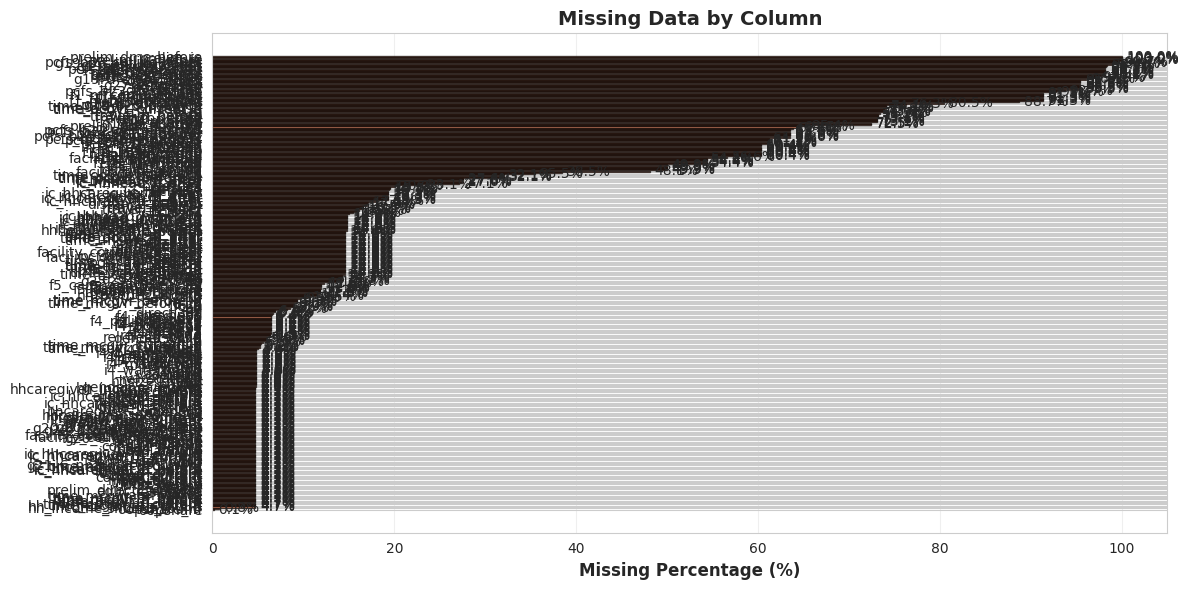

In [ ]:
# ============================================================================
# SECTION 3: MISSING DATA ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("🔍 SECTION 3: MISSING DATA ANALYSIS")
print("-" * 80)

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum().values / len(df) * 100).round(2),
    'Data_Type': df.dtypes.values
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)

if len(missing_data) > 0:
    print("\n⚠️ Columns with Missing Data:")
    print(missing_data.to_string(index=False))

    # Visualize missing data
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_data_sorted = missing_data.sort_values('Missing_Percentage', ascending=True)
    ax.barh(missing_data_sorted['Column'], missing_data_sorted['Missing_Percentage'],
            color='coral', alpha=0.7, edgecolor='black')
    ax.set_xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_title('Missing Data by Column', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

    for i, v in enumerate(missing_data_sorted['Missing_Percentage']):
        ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing data detected!")




🔢 SECTION 4: NUMERICAL FEATURES ANALYSIS
--------------------------------------------------------------------------------

📊 Found 358 numerical features:
  • hh_food_month
  • hh_health_month
  • hh_clothes_month
  • hh_supplies_month
  • hh_entertainment_month
  • hh_other_month
  • hh_rent_month
  • hh_taxes_month
  • h8
  • pcfs_c8
  • h7
  • pcfs_c7
  • h6
  • pcfs_c6
  • h5
  • pcfs_c5
  • h4
  • pcfs_c4
  • h3
  • pcfs_c3
  • h2
  • pcfs_c2
  • h1
  • pcfs_c1
  • dmctotal
  • nmctotal
  • ictotal_hh
  • ictotal_hhcaregiver
  • ictotal_hhhead
  • ic_hh_before
  • ic_hh_current
  • ic_hh_after
  • ic_hhcaregiver_before
  • ic_hhcaregiver_current
  • ic_hhcaregiver_after
  • ic_hhhead_before
  • ic_hhhead_current
  • ic_hhhead_after
  • nmc_before
  • nmc_current
  • nmc_after
  • dmc_before
  • dmc_current
  • dmc_after
  • time_d_before
  • time_d_current
  • time_d_after
  • time_h_before
  • time_h_current
  • time_h_after
  • time_m_before
  • time_m_current
  • time_m_after


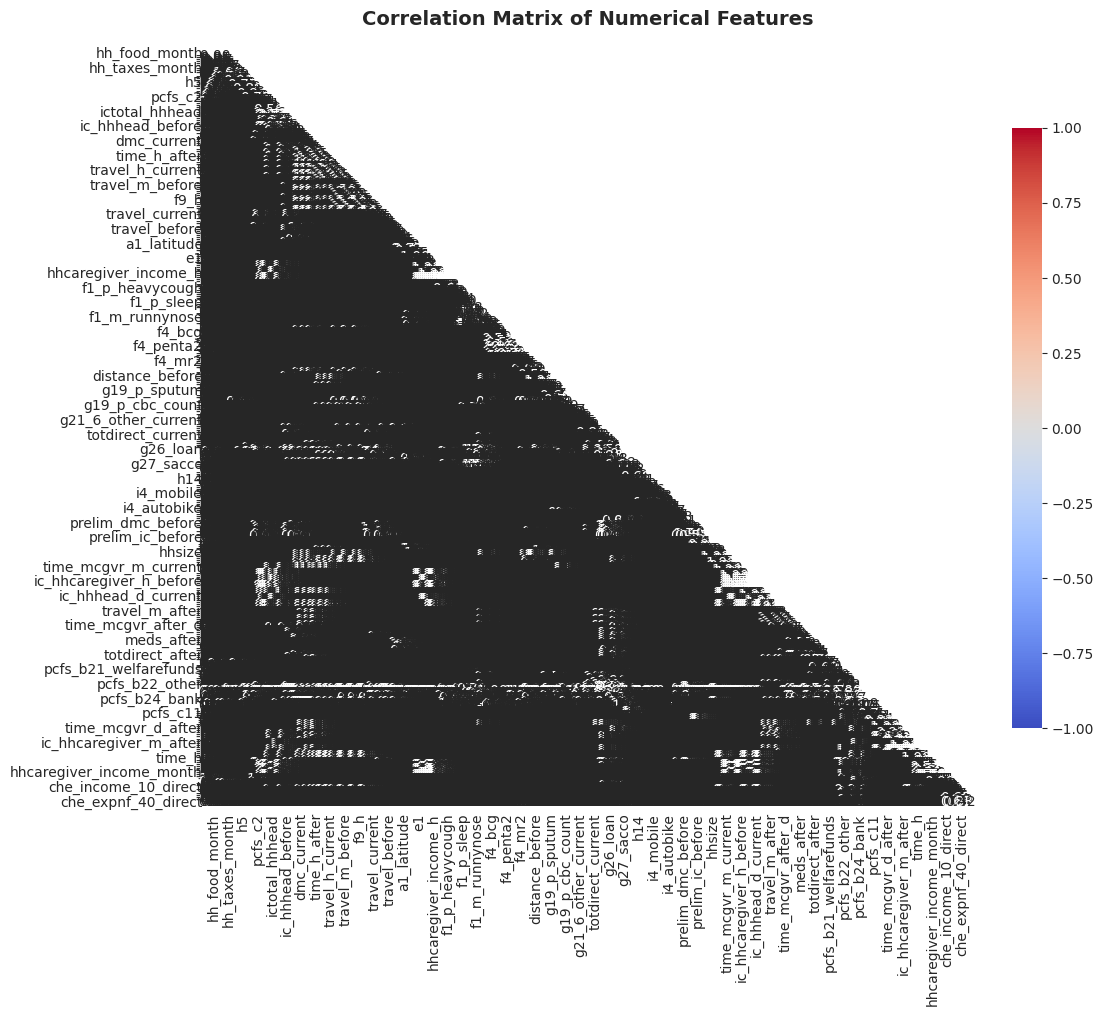


🔍 Strong Correlations (|r| > 0.7):
                Feature_1                Feature_2  Correlation
          hhhead_income_m      hhhead_income_month     1.000000
          hhhead_income_d      hhhead_income_month     1.000000
          hhhead_income_h      hhhead_income_month     1.000000
              hh_income_m              hh_income_h     1.000000
              hh_income_m              hh_income_d     1.000000
          hhhead_income_m          hhhead_income_h     1.000000
        ic_hhhead_current      ic_hhhead_m_current     1.000000
          hhhead_income_m          hhhead_income_d     1.000000
      ic_hhhead_m_current      ic_hhhead_h_current     1.000000
      ic_hhhead_m_current      ic_hhhead_d_current     1.000000
            time_h_before            time_m_before     1.000000
                     f9_m                     f9_d     1.000000
              hh_income_m          hh_income_month     1.000000
     hhcaregiver_income_m hhcaregiver_income_month     1.000000
    

In [ ]:
# ============================================================================
# SECTION 4: NUMERICAL FEATURES ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("🔢 SECTION 4: NUMERICAL FEATURES ANALYSIS")
print("-" * 80)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n📊 Found {len(numerical_cols)} numerical features:")
for col in numerical_cols:
    print(f"  • {col}")

if len(numerical_cols) > 0:
    # Descriptive statistics
    print("\n📈 Descriptive Statistics:")
    print(df[numerical_cols].describe().T.round(2))

    # Distribution plots
    if len(numerical_cols) <= 10:
        n_cols = min(3, len(numerical_cols))
        n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        else:
            axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

        fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold', y=1.00)

        for idx, col in enumerate(numerical_cols):
            ax = axes[idx]

            # Remove missing values for plotting
            data = df[col].dropna()

            if len(data) > 0:
                # Histogram with KDE
                ax.hist(data, bins=30, color='steelblue', alpha=0.7, edgecolor='black', density=True)

                # Add KDE curve
                try:
                    data_kde = data[np.isfinite(data)]
                    if len(data_kde) > 1:
                        kde = stats.gaussian_kde(data_kde)
                        x_range = np.linspace(data_kde.min(), data_kde.max(), 100)
                        ax.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')
                except:
                    pass

                ax.set_xlabel(col, fontsize=10, fontweight='bold')
                ax.set_ylabel('Density', fontsize=10)
                ax.set_title(f'{col}\nMean: {data.mean():.2f}, Std: {data.std():.2f}',
                           fontsize=10)
                ax.grid(alpha=0.3)

        # Hide empty subplots
        for idx in range(len(numerical_cols), len(axes)):
            axes[idx].set_visible(False)

        plt.tight_layout()
        plt.show()

    # Correlation analysis
    if len(numerical_cols) > 1:
        print("\n🔗 Correlation Analysis:")

        # Calculate correlation matrix
        corr_matrix = df[numerical_cols].corr()

        # Visualize correlation matrix
        fig, ax = plt.subplots(figsize=(12, 10))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
                   cmap='coolwarm', center=0, square=True,
                   linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
        ax.set_title('Correlation Matrix of Numerical Features',
                    fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()

        # Find strong correlations
        print("\n🔍 Strong Correlations (|r| > 0.7):")
        strong_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if abs(corr_matrix.iloc[i, j]) > 0.7:
                    strong_corr.append({
                        'Feature_1': corr_matrix.columns[i],
                        'Feature_2': corr_matrix.columns[j],
                        'Correlation': corr_matrix.iloc[i, j]
                    })

        if strong_corr:
            strong_corr_df = pd.DataFrame(strong_corr).sort_values(
                'Correlation', key=abs, ascending=False
            )
            print(strong_corr_df.to_string(index=False))
        else:
            print("  No strong correlations found.")

    # Outlier detection
    print("\n⚠️ Outlier Detection (using IQR method):")
    outlier_summary = []

    for col in numerical_cols:
        data = df[col].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_pct = len(outliers) / len(data) * 100

            if len(outliers) > 0:
                outlier_summary.append({
                    'Feature': col,
                    'Outlier_Count': len(outliers),
                    'Outlier_Percentage': outlier_pct,
                    'Lower_Bound': lower_bound,
                    'Upper_Bound': upper_bound
                })

    if outlier_summary:
        outlier_df = pd.DataFrame(outlier_summary).sort_values(
            'Outlier_Percentage', ascending=False
        )
        print(outlier_df.round(2).to_string(index=False))
    else:
        print("  No outliers detected.")

else:
    print("\n⚠️ No numerical features found in dataset.")



In [ ]:
# ============================================================================
# SECTION 5: CATEGORICAL FEATURES ANALYSIS
# ============================================================================

print("\n" + "=" * 80)
print("📊 SECTION 5: CATEGORICAL FEATURES ANALYSIS")
print("-" * 80)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\n📊 Found {len(categorical_cols)} categorical features:")
for col in categorical_cols:
    print(f"  • {col}")

if len(categorical_cols) > 0:
    # Value counts for each categorical feature
    print("\n📈 Categorical Feature Summary:")

    cat_summary = []
    for col in categorical_cols:
        n_unique = df[col].nunique()
        most_common = df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'
        most_common_freq = df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0
        most_common_pct = (most_common_freq / len(df) * 100) if len(df) > 0 else 0

        cat_summary.append({
            'Feature': col,
            'Unique_Values': n_unique,
            'Most_Common': str(most_common)[:30],
            'Most_Common_Freq': most_common_freq,
            'Most_Common_%': most_common_pct
        })

    cat_summary_df = pd.DataFrame(cat_summary)
    print(cat_summary_df.round(2).to_string(index=False))

    # Visualize top categories for each feature (if reasonable number)
    visualize_cats = [col for col in categorical_cols if df[col].nunique() <= 10]

    if len(visualize_cats) > 0 and len(visualize_cats) <= 6:
        n_cols = min(2, len(visualize_cats))
        n_rows = (len(visualize_cats) + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        else:
            axes = axes.flatten() if len(visualize_cats) > 1 else [axes]

        fig.suptitle('Distribution of Categorical Features',
                    fontsize=16, fontweight='bold', y=1.00)

        for idx, col in enumerate(visualize_cats):
            ax = axes[idx]

            value_counts = df[col].value_counts().head(10)

            ax.barh(range(len(value_counts)), value_counts.values,
                   color='mediumseagreen', alpha=0.7, edgecolor='black')
            ax.set_yticks(range(len(value_counts)))
            ax.set_yticklabels([str(x)[:20] for x in value_counts.index])
            ax.set_xlabel('Frequency', fontsize=11, fontweight='bold')
            ax.set_title(f'{col}\n({df[col].nunique()} unique values)',
                        fontsize=11, fontweight='bold')
            ax.grid(axis='x', alpha=0.3)

            # Add value labels
            for i, v in enumerate(value_counts.values):
                ax.text(v + max(value_counts.values)*0.01, i,
                       f'{v} ({v/len(df)*100:.1f}%)',
                       va='center', fontsize=9)

        # Hide empty subplots
        for idx in range(len(visualize_cats), len(axes)):
            axes[idx].set_visible(False)

        plt.tight_layout()
        plt.show()

else:
    print("\n⚠️ No categorical features found in dataset.")




📊 SECTION 5: CATEGORICAL FEATURES ANALYSIS
--------------------------------------------------------------------------------

📊 Found 172 categorical features:
  • surveystart
  • surveyend
  • surveytoday
  • username
  • deviceid
  • a1
  • a2
  • a3
  • a4
  • b1
  • b1_other
  • b2
  • b3_public
  • b3_private
  • consent
  • c1
  • c2
  • c3_caretakerid
  • c3_confirm
  • d1
  • d3
  • d4
  • d5
  • d5_other
  • d6
  • d7
  • d8
  • d8_other
  • e5
  • e6
  • e7_hhhead
  • e8_hhhead
  • e9_hhhead
  • e9_hhcaregiver
  • e10_hhhead
  • e10_hhcaregiver
  • e12
  • e13
  • f1_p
  • f1_d
  • f1_m
  • f3
  • f3_picture
  • f4
  • f5_bcgdate
  • f5_bcg
  • f5_polioopvbirthdate
  • f5_polioopvbirth
  • f5_polioopv1date
  • f5_polioopv1
  • f5_polioopv2date
  • f5_polioopv2
  • f5_polioopv3date
  • f5_polioopv3
  • f5_polioipvdate
  • f5_polioipv
  • f5_penta1date
  • f5_penta1
  • f5_penta2date
  • f5_penta2
  • f5_penta3date
  • f5_penta3
  • f5_pcv1date
  • f5_pcv1
  • f5_pcv2date
  • f


🔗 SECTION 6: FEATURE RELATIONSHIPS
--------------------------------------------------------------------------------

📊 Creating pairplot for numerical features...


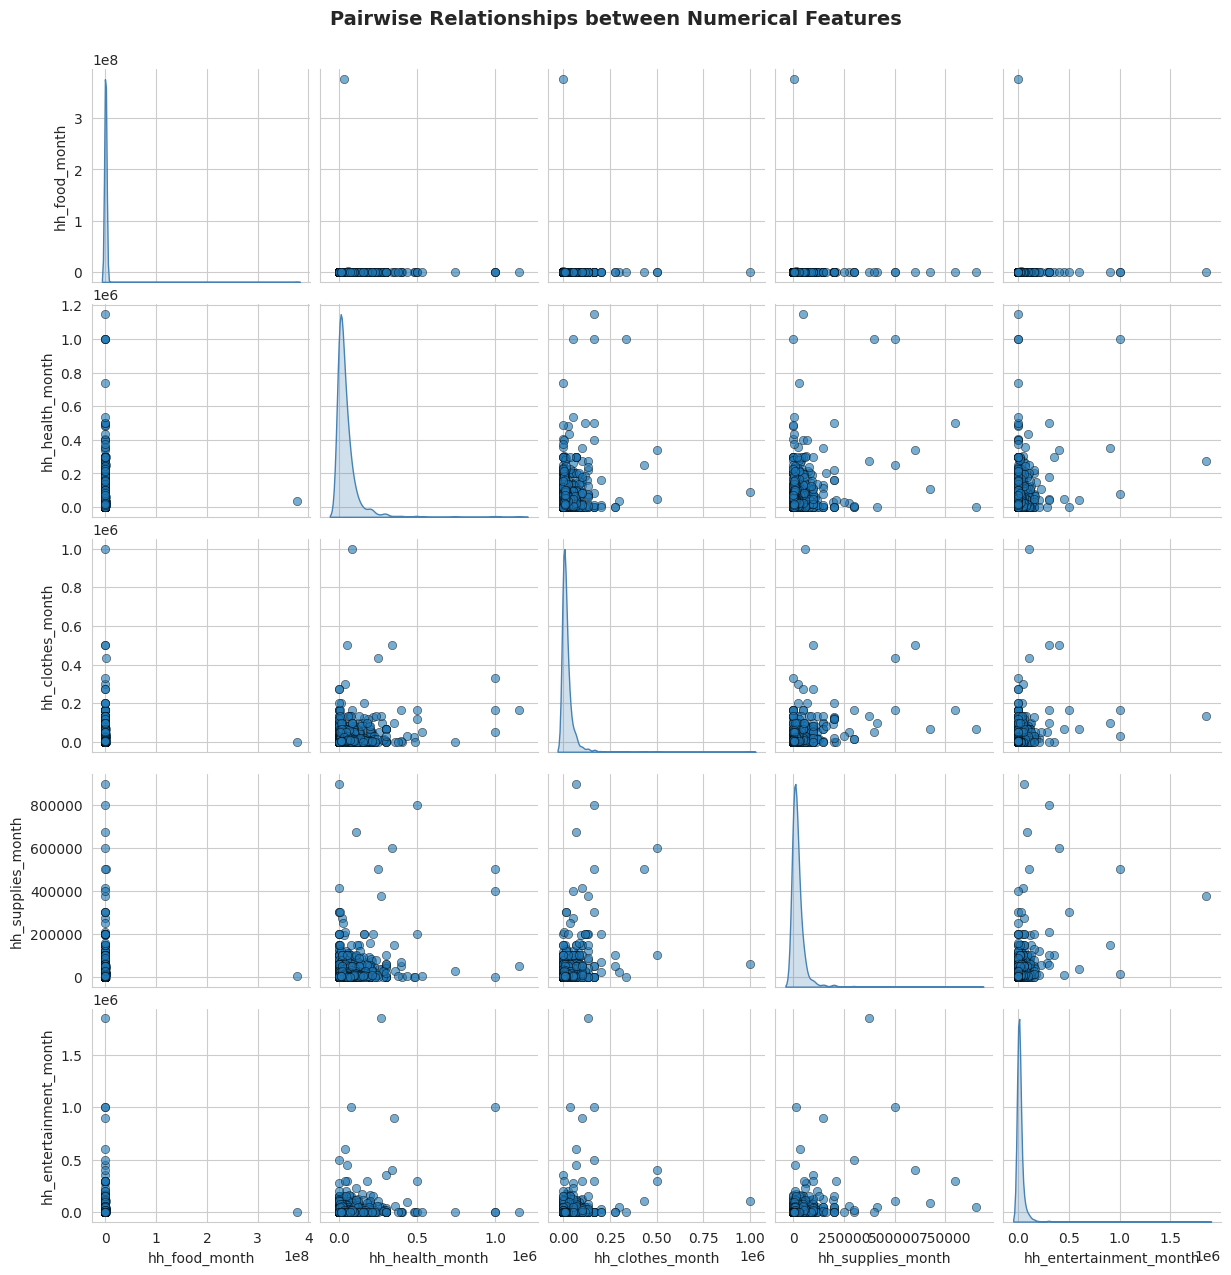

✓ Pairplot created successfully!


In [ ]:
# ============================================================================
# SECTION 6: FEATURE RELATIONSHIPS
# ============================================================================

print("\n" + "=" * 80)
print("🔗 SECTION 6: FEATURE RELATIONSHIPS")
print("-" * 80)

if len(numerical_cols) >= 2:
    # Pairplot for selected numerical features (max 5)
    print("\n📊 Creating pairplot for numerical features...")

    selected_cols = numerical_cols[:min(5, len(numerical_cols))]

    if len(selected_cols) >= 2:
        try:
            pairplot_fig = sns.pairplot(df[selected_cols].dropna(),
                                       diag_kind='kde',
                                       plot_kws={'alpha': 0.6, 'edgecolor': 'black'},
                                       diag_kws={'color': 'steelblue'})
            pairplot_fig.fig.suptitle('Pairwise Relationships between Numerical Features',
                                     y=1.02, fontsize=14, fontweight='bold')
            plt.show()
            print("✓ Pairplot created successfully!")
        except Exception as e:
            print(f"⚠️ Could not create pairplot: {e}")



In [ ]:
# ============================================================================
# SECTION 7: DATA QUALITY REPORT
# ============================================================================

print("\n" + "=" * 80)
print("✅ SECTION 7: DATA QUALITY REPORT")
print("-" * 80)

# Calculate quality metrics
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
completeness = ((total_cells - missing_cells) / total_cells * 100)

print(f"\n📊 Overall Data Quality:")
print(f"  • Completeness: {completeness:.2f}%")
print(f"  • Missing Cells: {missing_cells:,} out of {total_cells:,}")

# Duplicate rows
duplicates = df.duplicated().sum()
print(f"  • Duplicate Rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")

# Features with high missingness (>50%)
high_missing = [col for col in df.columns if df[col].isnull().sum() / len(df) > 0.5]
if high_missing:
    print(f"\n⚠️ Features with >50% missing data:")
    for col in high_missing:
        pct = df[col].isnull().sum() / len(df) * 100
        print(f"  • {col}: {pct:.1f}%")

# Constant features (zero variance)
constant_features = [col for col in df.columns if df[col].nunique() <= 1]
if constant_features:
    print(f"\n⚠️ Constant features (no variation):")
    for col in constant_features:
        print(f"  • {col}")




✅ SECTION 7: DATA QUALITY REPORT
--------------------------------------------------------------------------------

📊 Overall Data Quality:
  • Completeness: 81.87%
  • Missing Cells: 165,055 out of 910,540
  • Duplicate Rows: 0 (0.00%)

⚠️ Features with >50% missing data:
  • time_ocgvr_current_m: 74.1%
  • time_ocgvr_current_h: 74.1%
  • time_ocgvr_current_d: 74.1%
  • travel_m_before: 73.2%
  • f9_m: 73.7%
  • travel_h_before: 73.2%
  • f9_h: 73.7%
  • travel_d_before: 73.2%
  • f9_d: 73.8%
  • d7_age: 92.7%
  • f1_p_fever: 60.4%
  • f1_p_drycough: 60.4%
  • f1_p_heavycough: 60.4%
  • f1_p_diffbreath: 60.4%
  • f1_p_respiratory: 60.4%
  • f1_p_wheezing: 60.4%
  • f1_p_grunting: 60.4%
  • f1_p_nofeed: 60.4%
  • f1_p_nasalflaring: 60.4%
  • f1_p_sleep: 60.4%
  • f1_d_runnystool: 54.4%
  • f1_d_bloodstool: 54.4%
  • f1_d_fever: 54.4%
  • f1_d_chills: 54.4%
  • f1_d_vomiting: 54.4%
  • f1_m_cough: 91.3%
  • f1_m_runnynose: 91.3%
  • f1_m_conjunctivitis: 91.3%
  • f1_m_rashforehead: 91.3

In [ ]:
# ============================================================================
# SECTION 8: SUMMARY STATISTICS EXPORT
# ============================================================================

print("\n" + "=" * 80)
print("💾 SECTION 8: EXPORT SUMMARY")
print("-" * 80)

# Create comprehensive summary
summary_dict = {
    'Dataset_Info': {
        'Total_Rows': df.shape[0],
        'Total_Columns': df.shape[1],
        'Numerical_Features': len(numerical_cols),
        'Categorical_Features': len(categorical_cols),
        'Memory_MB': df.memory_usage(deep=True).sum() / 1024**2,
        'Completeness_%': completeness
    },
    'Numerical_Summary': df[numerical_cols].describe().to_dict() if numerical_cols else {},
    'Missing_Data': missing_data.to_dict('records') if len(missing_data) > 0 else []
}

# Save summary to text file
summary_text = f"""
================================================================================
DATASET FEATURE ANALYSIS SUMMARY
================================================================================
File: {filename}
Analysis Date: 2026-01-07

DATASET OVERVIEW
----------------
Total Observations: {df.shape[0]:,}
Total Features: {df.shape[1]}
Numerical Features: {len(numerical_cols)}
Categorical Features: {len(categorical_cols)}
Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

DATA QUALITY
------------
Completeness: {completeness:.2f}%
Missing Cells: {missing_cells:,} out of {total_cells:,}
Duplicate Rows: {duplicates} ({duplicates/len(df)*100:.2f}%)

NUMERICAL FEATURES
------------------
{df[numerical_cols].describe().to_string() if numerical_cols else 'None'}

CATEGORICAL FEATURES
--------------------
{cat_summary_df.to_string(index=False) if len(categorical_cols) > 0 else 'None'}

==============================================================================
"""

# You can now save summary_text to a file or print it.
# For example, to save to a file:
# with open('summary_report.txt', 'w') as f:
#     f.write(summary_text)
# print("\n✓ Summary report saved to 'summary_report.txt'")


💾 SECTION 8: EXPORT SUMMARY
--------------------------------------------------------------------------------
